# Week 8 - Estimation

This is a Jupyter notebook to explore the material in (Ross, 2017, Chp. 8). 



In [1]:
%matplotlib inline
# from now on we'll start each notebook with the library imports
# and special commands to keep these things in one place (which
# is good practice). The line above is jupyter command to get 
# matplotlib to plot inline (between cells)
# Next we import the libraries and give them short names
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict

## Exercise A

Complete questions 6, 7 and 10 from (Ross, 2017, Sec. 8.2 Problems) and questions 1 and 2 from (Ross, 2017, Sec. 8.3 Problems) -- the text is repeated below for convenience:

### Section 8.2

> 6. A proposed study for estimating the average cholesterol level of working
adults calls for a sample size of 1000. If we want to reduce the resulting
standard error by a factor of 4, what sample size is necessary?

> 7. It is known that the standard deviation of the weight of a newborn child
is 10 ounces. If we want to estimate the average weight of a newborn,
how large a sample will be needed for the standard error of the estimate
to be less than 3 ounces?

> 10. Does (a) or (b) yield a more precise estimator of μ?
>
>    (a) The sample mean of a sample of size n from a population with
mean μ and variance σ 2
>
>    (b) The sample mean of a sample of size 3n from a population with
mean μ and variance 2σ 2
>
>    (c) How large would the sample in (b) have to be in order to match
the precision of the estimator in (a)?

### Section 8.3


> 1. In 1985, out of a random sample of 1325 North Americans questioned,
510 said that the Communist party would win a free election if one were
held in the Soviet Union. Estimate the proportion of all North Americans
who felt the same way at that time.
>
> 2. Estimate the standard error of the estimate in Prob. 1.

*complete your answers in Markdown*

### Section 8.2

#### Question 6.
Standard error is given by:
$$\frac{\sigma}{\sqrt{n}}$$
where $\sigma$ is the population standard deviation and $n$ is the sample size. For us we have an initial sample size of $n_1 = 1000$, we want a new sample size, $n_2$ that reduces the standard error by a factor of $4$, more formally:
$$\frac{1}{4}\frac{\sigma}{\sqrt{n_1}} = \frac{\sigma}{\sqrt{n_2}}$$

Rearranging gives
$$\sqrt{n_2} = 4\sqrt{n_1}$$
and so
$$n_2 = 16 n_1 = 16000$$

#### Question 7.

Call the population SD for newborns $\sigma = 10 \,\text{ounces}$. We want to estimate the sample size $n$ required for the standard error to be below $3 \,\text{ounces}$. THat is to choose $n$ such that:
$$\frac{\sigma}{\sqrt{n}} = \frac{10}{\sqrt{n}} \leq 3$$

Rearranging and squaring both sides gives:
$$n \geq \left(\frac{10}{3}\right)^2 = \frac{100}{9} = 11.1$$

The best sample size must be an integer so we take the ceiling of this value (round up to the nearest integer) giving sample size
$$n = \left\lceil 11.1 \right\rceil  = 12$$

where $\left\lceil x\right\rceil $ denotes the ceiling of $x$.


#### Question 10.

In case (a) we have a standard error of $=\frac{\sigma}{\sqrt{n}}$ call this $\epsilon$. In case (b) we have a standard error of  $\frac{3\sigma}{\sqrt{2n}} = \frac{3}{\sqrt{2}}\epsilon$. So the standard error in case (a) is smaller than in case (b).

For  case (b) to give the same standard error as case (a) we would need a sample size $n_b$ where:
$$\frac{3\sigma}{\sqrt{n_b}} = \frac{\sigma}{\sqrt{n}}$$
which by inspection gives
$$n_b = 9n$$

### Section 8.3

#### Question 1.

We're wanting to estimate the proportion, $p$, of some characteristic (what proportion of North American's  in 1985 thinks the communist party would win a free election). With a random sample of size $n=1325$. Our sample count is $X=510$ and so our sample proporition (and our proportion estimate) 
$$\hat{p} = \frac{510}{1325} = 0.385$$

### Question 2.
An upper bound on the value $SD(\hat{p})$ from the previous question takes advantage of the inequality (for any unknown proportion $p$) that
$$SD(\hat{p}) \leq \frac{1}{2\sqrt{n}} = 0.007$$

In [16]:
## Supporting code for Exercise A

## Section 8.3 - question 1
phat = 510/1325
print(f"phat = {phat:.3f}")
SDupperbound = 1/2/np.sqrt(1325)
print(f"Upper bound on SD(phat) = {upperbound:.3f}")
# we have not been advised to do this (yet) but we can estimate this
# SD by using our estimate for p
SDestimate = phat *(1-phat)/np.sqrt(1325)
print(f"Another estimate for SD(phat) = {upperbound:.3f}")


phat = 0.385
Upper bound on SD(phat) = 0.007
Another estimate for SD(phat) = 0.007


## Exercise B

Complete questions 6, 7, 8, 13 and 14 from (Ross, 2017, Sec. 8.4 Problems). The text is repeated below for convenience:

> Problems 6, 7, and 8 refer to the following sample data:
>
>    104, 110, 114, 97, 105, 113, 106, 101, 100, 107
>
> 6. Estimate the population mean μ and the population variance $\sigma^2$ .
>
> 7. Suppose it is known that the population mean is 104. Estimate the population variance.
>
> 8. Suppose it is known that the population mean is 106. Estimate the population standard deviation.

> 13. The linear random walk model for the successive daily prices of a stock
or commodity supposes that the successive differences of the end-of-day
prices of a given stock constitute a random sample from a normal popu-
lation. The following 20 data values represent the closing prices of crude
oil on the New York Mercantile Exchange on 20 consecutive trading days
in 1994. Assuming the linear random walk model, use these data to es-
timate the mean and standard deviation of the population distribution.
(Note that the data give rise to 19 values from this distribution, the first
being 17.60 − 17.50 = 0.10, the second being 17.81 − 17.60 = 0.21, and
so on.)
>
>    17.50, 17.60, 17.81, 17.67, 17.53, 17.39, 17.12, 16.71, 16.70, 16.83,
17.21, 17.24, 17.22, 17.67, 17.83, 17.67, 17.55, 17.68, 17.98, 18.39

Hint: You can calculate the population of differences using numpy slicing. For example, for 1d array `x` and positive integers `i` and `j` less than `x.size`, then `x[i:j]` is the sub-array formed by the `i`th (inclusive) to `j`th (not inclusive) elements of `x` - see [here](https://www.w3schools.com/python/numpy_array_slicing.asp) for more information.

> 14. Due to a lack of precision in the scale used, the value obtained when a
fish is weighed is normal with mean equal to the actual weight of the fish
and with standard deviation equal to 0.1 grams. A sample of 12 different
fish was chosen, and the fish were weighed, with the following results:
>
>    5.5, 6.2, 5.8, 5.7, 6.0, 6.2, 5.9, 5.8, 6.1, 6.0, 5.7, 5.6
>
>    Estimate the population standard deviation of the actual weight of a fish.
>
>    Hint: First note that, due to the error involved in weighing a fish, each
data value is not the true weight of a fish, but rather is the true weight
plus an error term. This error term is an independent random variable
that has mean 0 and standard deviation 0.1. Therefore,
>
>    Data = true weight + error
>
>    and so
>
>    Var(data) = Var(true weight) + Var(error)
>
>    To determine the variance of the true weight, first estimate the variance
of the data.

*Write up in markdown but you may want to use the code block below to complete your calculations.*

#### Question 6.

Sample mean:
$$\bar{x} = \frac{\sum_{i}^{n}X_i}{n} = \frac{1057}{10} = 105.7$$ 

Sample variance:
$$S^2 = \frac{\sum_{i}^{n}(X_i-\bar{x})^2}{n-1} = 30.7$$ 

#### Question 7.
Sample variance using population mean $\mu = 104$
$$S^2 = \frac{\sum_{i}^{n}(X_i-\mu)^2}{n} = 30.5$$ 

#### Question 8.
Sample variance using population mean $\mu = 106$
$$S^2 = \frac{\sum_{i}^{n}(X_i-\mu)^2}{n} = 27.7$$ 

#### Question 13.

There are $19$ data-points. With sample mean $0.0468$ and sample standard deviation $0.566

#### Question 14.

The data has mean and variance of:

$$\bar{x}_{\text{data}} = 5.9$$

$$S^2_{\text{data}} = 0.0530$$

The mean of a RV which is the sum of two RVs is equal to the sum of their means. As the error has mean $0$ the mean of the data is the mean of the weights: 
$$\bar{x}_{\text{weight}} = 5.9$$

Taking advantage of the fact that the sum of two independent variables has a variance equal to the sum of the variances of the component RVs, and rearranging we have:

Var(true weight) = Var(data) - Var(error)

We can calculate the variance and hence SD of the true weight as:
$$S^2_{\text{weight}} = 0.0430$$

$$S_{\text{weight}} = 0.207$$


In [43]:
## supporting code for Exercise B

## Question 6.
print("Question 6.")
data = np.array([104, 110, 114, 97, 105, 113, 106, 101, 100, 107])
n = data.size
xbar = np.mean(data) # or np.sum(data)/n
print(f"np.sum(data) = {np.sum(data)}")
print(f"xbar = {xbar}")
# sample variance
S2 = np.sum((data-xbar)**2)/(n-1) # or np.var(data, ddof=1)
print(f"Q6. S2 = {S2:.1f}")
print()

## Question 7.
print("Question 7.")
# sample variance using pop mean 104
mu = 104
S2 = np.sum((data-mu)**2)/n
print(f"Q7. S2 = {S2:.1f}")
print()

# Question 8.
print("Question 8.")
# sample variance using pop mean 104
mu = 106
S2 = np.sum((data-mu)**2)/n
print(f"Q8. S2 = {S2:.1f}")
print()

## Question 13.
print("Question 13.")
prices = np.array([ 17.50, 17.60, 17.81, 17.67, 17.53, 17.39, 17.12, 16.71, 16.70, 16.83,
                  17.21, 17.24, 17.22, 17.67, 17.83, 17.67, 17.55, 17.68, 17.98, 18.39])
differences = prices[1:]-prices[:-1]
n = differences.size
print(f"differences = {differences}")
print(f"n = {n}")
mean_difference = np.mean(differences)
sd_difference = np.sum((differences-mean_difference)**2)/(n-1)
print(f"mean difference is {mean_difference:.4f}")
print(f"SD difference is {sd_difference:.4f}")
print()

## Question 14.
print("Question 14.")
data = np.array([5.5, 6.2, 5.8, 5.7, 6.0, 6.2, 5.9, 5.8, 6.1, 6.0, 5.7, 5.6])
n = data.size
sd_error = 0.1
var_error = sd_error**2
mean_data = np.mean(data)
var_data = np.sum((data-mean_data)**2)/(n-1) 
var_weight = var_data - var_error
sd_weight = np.sqrt(var_weight)
print(f"mean_data = {mean_data:.1f}")
print(f"n = {n}")
print(f"var_error = {var_error:.2f}")
print(f"var_data = {var_data:.4f}")
print(f"var_weight = {var_weight:.4f}")
print(f"sd_weight = {sd_weight:.3f}")

Question 6.
np.sum(data) = 1057
xbar = 105.7
Q6. S2 = 30.7

Question 7.
Q7. S2 = 30.5

Question 8.
Q8. S2 = 27.7

Question 13.
differences = [ 0.1   0.21 -0.14 -0.14 -0.14 -0.27 -0.41 -0.01  0.13  0.38  0.03 -0.02
  0.45  0.16 -0.16 -0.12  0.13  0.3   0.41]
n = 19
mean difference is 0.0468
SD difference is 0.0566

Question 14.
mean_data = 5.9
n = 12
var_error = 0.01
var_data = 0.0530
var_weight = 0.0430
sd_weight = 0.207


## Exercise C

Complete questions 1, 10 and 11 from (Ross, 2017, Sec. 8.5 Problems). The text is repeated below for convenience:

> 1. An electric scale gives a reading equal to the true weight plus a random
error that is normally distributed with mean 0 and standard deviation
σ = 0.1 ounces. Suppose that the results of five successive weighings of
the same object are as follows: 
>
>    3.142, 3.163, 3.155, 3.150, 3.141.
>
>    (a) Determine a 95 percent confidence interval estimate of the true
weight.
>
>    (b) Determine a 99 percent confidence interval estimate of the true
weight.

> 10. The average life of a sample of 10 tires of a certain brand was 28,400
miles. If it is known that the lifetimes of such tires are normally dis-
tributed with a standard deviation of 3300 miles, determine a 95 percent
confidence interval estimate of the mean life.
>
> 11. For Prob. 10, how large a sample would be needed to obtain a 99 percent
confidence interval estimator of smaller size than the interval obtained
in the problem?


*complete in markdown but you can use the code block below for any calculations*

#### Question 1.
We can think of the measured weight as being the true weight $w$ plus an error $\epsilon$. Assuming the true weight is a fixed constant, the resulting random variable has mean $\mu = w$ and SD $\sigma=0.1$.

Calculating the sample mean $\bar{X} = 3.15$, we can now calculate the:

(a) 95\% confidence interval as:

$$\bar{X} \pm 1.96\frac{\sigma}{\sqrt{n}} = 3.15 \pm 0.0877$$

using $z_{0.025} = 1.96$

(b) 99\% confidence interval as:

$$\bar{X} \pm 2.576\frac{\sigma}{\sqrt{n}} = 3.15 \pm 0.1152$$

using $z_{0.005} = 2.576$

#### Question 10.

We have a sample of $n_a=10$ tires with sample mean life of $28400$ miles. We also know that the population SD is $\sigma=3300$ miles.

By standardising our RV for the sample mean we can state:

$$\Pr\left(\bar{X}-z_{0.025}\frac{\sigma}{\sqrt{n}} < \mu < \bar{X}-z_{0.025}\frac{\sigma}{\sqrt{n}}\right) = 0.95$$

Or, put another way, the 95\% confidence interval estimate of the mean life is

$$\bar{X} \pm z_{0.025}\frac{\sigma}{\sqrt{n_a}} = 28400 \pm 1.96\cdot \frac{3300}{\sqrt{10}} = 28400 \pm 2045 \text{ miles}$$ 

#### Question 11.
To obtain a 99\% confidence interval estimator smaller than
$$l = 2z_{0.025}\frac{\sigma}{\sqrt{n_a}} = 2\cdot 2045 = 4091$$
we need a sample size $n_b$ such that:

$$n_b \geq \left(\frac{2z_{0.005}\sigma}{l}\right)^2 = 17.2$$

And so the smallest value we can choose is $n_b = 18$

A more direct calculation says that if $n_a$ gave a 95\% interval and we want to calculate $n_b$ for a $99\%$ interval that is smaller then:
$$n_b
\geq \left(\frac{2z_{0.005}\sigma}{2z_{0.025}\sigma/\sqrt{n_a}}\right)^2 = \left(\frac{z_{0.005}}{z_{0.0025}}\right)^2n_a$$

In [209]:
## supporting code for exercise C
## question 1.
print("Question 1")
data = np.array([3.142, 3.163, 3.155, 3.150, 3.141])
n = data.size
sigma = 0.1
z0025 = 1.96
z0005 = 2.576
print(f"n = {n}")
Xbar = np.mean(data)
print(f"sample mean = {Xbar:.2f}")
# sd of the mean
mean_sd = sigma/np.sqrt(n)
print(f"sd of mean = {mean_sd:.5f}")
print(f"95% confidence interval for population mean is {mean:.2f} +/- {z0025*mean_sd:.4f}")
print(f"99% confidence interval for population mean is {mean:.2f} +/- {z0005*mean_sd:.4f}")
print()

print("Question 10.")
Xbar = 28400
sigma = 3300
n_a = 10
print(f"95% confidence interval is {Xbar} +/- {z0025*sigma/np.sqrt(n_a):.0f}")
length = 2*z0025*sigma/np.sqrt(n_a)
print()

print("Question 11.")
print(f"Length of 95% confidence interval is {length:.0f}")
print(f"For a 99% confidence interval that is smaller we need:")
print(f"\tsample size n_b >= {(2*z0005*sigma/length)**2}")
n_b = int(np.ceil((2*z0005*sigma/length)**2))
print(f"So we choose n_b = {n_b}")
print()


Question 1
n = 5
sample mean = 3.15
sd of mean = 0.04472
95% confidence interval for population mean is 3.15 +/- 0.0877
99% confidence interval for population mean is 3.15 +/- 0.1152

Question 10.
95% confidence interval is 28400 +/- 2045

Question 11.
Length of 95% confidence interval is 4091
For a 99% confidence interval that is smaller we need:
	sample size n_b >= 17.27346938775511
So we choose n_b = 18



## Exercise D

Complete question 18 from problems for (Ross, 2017, Sec. 8.6). The text is repeated below for convenience:

> 18. The geometric random walk model for the price of a stock supposes that
the successive differences in the logarithms of the closing prices of the
stock constitute a sample from a normal population. This implies that
the percentage changes in the successive closing prices constitute a random
sample from a population (as opposed to the linear random walk
model given in Problem 13 of Sec. 8.4, which supposes that the magnitudes
of the changes constitute a random sample). Thus, for instance,
under the geometric random walk model, the chance that a stock whose
price is 100 will increase to 102 is the same as the chance when its price
is 50 that it will increase to 51.
>
>    The following data give the logarithms and the successive differences of
the logarithms of the closing crude oil prices of 20 consecutive trading
days in 1994. Assuming the applicability of the geometric random walk
model, use them to construct a 95 percent confidence interval for the
population mean.

The prices themselves are provided below. You can calculate their logs and the differences of the logs using Numpy.

In [205]:
## complete in python
# we'll start with the prices and calculate the other columns
prices = np.array([
    17.50, 17.60, 17.81, 17.67, 17.53, 17.39, 17.12, 16.71, 16.70, 16.83, 17.21,
    17.24, 17.22, 17.67, 17.83, 17.67, 17.55, 17.68, 17.98, 18.39])
logPrices = np.log(prices)
logPriceDiffs = logPrices[1:] - logPrices[:-1]
n = logPriceDiffs.size

# calculating the sample mean and variance
Xbar = np.mean(logPriceDiffs)
S2 = np.var(logPriceDiffs, ddof=1)
S = np.sqrt(S2)

print(f"Xbar = {Xbar:.5f}")
print(f"S2 = {S2:.6f}")
print(f"S = {S:.4f}")

# we must use the t distribution with n-1 degrees of freedom to 
# calculate the interval. We can use the table from the book or
# calculate it using the Scipy library (here I do the latter)
dof = n-1
print(f"Degrees of freedom are {dof}")
# we want the t percentile for n-1 degrees of freedom at alpha/2
# where 100(1-alpha) = 95 (for the 95% confidence interval)
# this is the (1-alpha/2) percentile of the t-distribution 
tpercentile = stats.t.ppf(0.975, dof)
print(f"tpercentile = {tpercentile:.3f}")
print(f"95% confidence interval of the mean is {Xbar:.5f} ± {tpercentile*S/np.sqrt(n):.5f}")
print(f"That is to say that with 95% confidence the population mean lies in the range " \
      f"[{Xbar-tpercentile*S/np.sqrt(n):.5f}, {Xbar+tpercentile*S/np.sqrt(n):.5f}]")

Xbar = 0.00261
S2 = 0.000186
S = 0.0136
Degrees of freedom are 18
tpercentile = 2.101
95% confidence interval of the mean is 0.00261 ± 0.00658
That is to say that with 95% confidence the population mean lies in the range [-0.00396, 0.00919]


### Exercise D supplementary

To illustrate the approximation that is happening in the above exercise the framework of a plot is provided. You just need to provide estimates for:

* the sample mean $\bar{X}$
* sample SD of the data $S$
* estimated SD of the mean
* the number of degrees of freedom $d$ of the appropriate t-distribution
* and the appropriate t-distribution percentile value for the 95% confidence interval  

The plot will:

* Histogram the original differences of log prices data from above
* Draw the 95% confidence interval (in red below the $y=0$ line)
* Plot a normal distribution corresponding to the point estimates $\bar{X}$ and $S$ (black). This is an approximation of the data distribution itself based on these values.
* Plot a t-distribution of the uncertainty in the mean (dotted red curve).

Explore the code yourself to try to understand how this is achieved. Think how you would change things:

* To instead draw the 99% confidence interval
* To instead draw the 95% lower bound with a vertical line
* To replot the 95% confidence interval, if you had a known population SD, $\sigma$
 

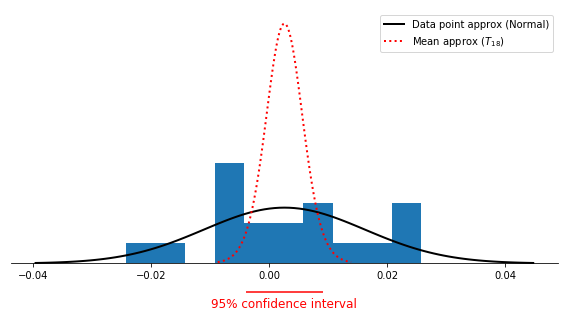

In [183]:
### this block will construct the described plot if you provide the following values
## to complete
# the sample mean
Xbar = Xbar
# sample SD of the data $S$
S = S
# estimated SD of the mean
Smean = S/np.sqrt(n)
# the number of degrees of freedom $d$ of the appropriate t-distribution
dof = dof
# and the appropriate t-distribution percentile value for the 95% confidence interval  
tpercentile = tpercentile

### provided code
## create the figure and axis
fig, ax = plt.subplots(figsize=(8,4.5))

## histogram the data with relative frequency
ax.hist(logPriceDiffs, density=True)

## plot a horizontal line corresponding to the 95% confidence interval
# upper and lower boundaries of the 95% interval
upper = Xbar + tpercentile*Smean 
lower = Xbar - tpercentile*Smean 
# y position of the line
yPosInterval = -15.0
# the line
ax.hlines(yPosInterval, lower, upper, 'r')
# a label for the line
ax.text(
    Xbar, yPosInterval*1.2, r'95% confidence interval',
    ha='center', va='top', color='r', fontsize=12)

## plot the normal distribution corresponding to the point
## estimates of the mean and standard deviation
# the distribution
normRV = stats.norm(loc=Xbar, scale=S)
# the x-values for the plot
xs = np.linspace(normRV.ppf(0.001), normRV.ppf(0.999), 101)
# draw the curve
ax.plot(xs, normRV.pdf(xs), 'k-', lw=2, label='Data point approx (Normal)')

## plot the t-distribution of the mean
# create the t distribution
tRV = stats.t(dof, loc=Xbar, scale=Smean)
# calculate reasonable x-values for distribution plot
xs = np.linspace(tRV.ppf(0.001), tRV.ppf(0.999), 101)
# draw the curve
ax.plot(xs, tRV.pdf(xs), 'r:', lw=2, label=r'Mean approx ($T_{%d}$)' % dof)

## make it pretty
# draw the legend
ax.legend()
# for improved visibility remove some of the grid-lines
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_yticks([])

plt.tight_layout()

## Exercise E

Complete questions 9 and 18 from (Ross, 2017, Sec. 8.7 Problems). The text is repeated below for convenience:

> 9. A wine importer has the opportunity to purchase a large consignment
of 1947 Chateau Lafite Rothschild wine. Because of the wine’s age, some
of the bottles may have turned to vinegar. However, the only way to de-
termine whether a bottle is still good is to open it and drink some. As a
result, the importer has arranged with the seller to randomly select and
open 20 bottles. Suppose 3 of these bottles are spoiled. Construct a 95
percent confidence interval estimate of the proportion of the entire consignment
that is spoiled.

*Hint: Take care considering the range of possible values.*

> 18. A recent newspaper poll indicated that candidate A is favored over
candidate B by a 53-to-47 percentage, with a margin of error of ±4 percent.
The newspaper then stated that since the 6-point gap is larger than the
margin of error, its readers can be certain that candidate A is the current
choice. Is this reasoning correct?

*complete in markdown using the code block below for any calculation*

#### Question 9.

We have a binomial distribution $\text{Binomial}(20,p)$ for which we wish to estimate $p$. The sample of successes (spoiled bottles) in a sample of $n=20$ is $X=3$. The point estimate for the proportion $p$ is:

$$\hat{p} = \frac{X}{n}= 0.15$$

Approximating the SD of the estimation, we have:

$$SD(\hat{p}) = \sqrt{\frac{p(1-p)}{n}} \approx \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}= 0.0798$$

A 95% confidence interval for proportion p is therefore:

$$\hat{p} \pm z_{0.025}SD(\hat{p}) \approx 0.15 \pm 1.96\cdot 0.798 =  0.15 \pm 0.156$$

#### Question 18.

The first aspect to this involves the word certain. Confidence intervals
only give a range for which we can be confident (at some level) that the
parameter of interest lies in that range. For a 95% confidence interval
we say we are 95% confident that the parameter lies in the range. 
This is a bit like saying there is a $0.95$ chance that the parameter lies
in the range (see below).

However, I think that in this question Ross was really asking about
something else. Consider that the estimate of the proportion voting
for candidate A is:
$$53 \pm 4 percent$$

Then we are saying that with our given level of confidence (not stated here)
then our population proportion, $p$ (of people who favour candidate A), lies
in the range $[49, 57]$. Clearly, this range includes values $49$ for which
more people favour candidate B. Even though there is a 6 point gap in 
poll proportions, there is only a 3 point gap between 53% and breaking even
at 50% (the proportion who favour Candidate B is functionally determined by
the proportion who favour Candidate A).

**Why "95% confident" and not "0.95 probability"?**

This is quite a nuanced argument. If we are being precise, then we would
say that, given the assumptions (normality, independence), if the entire
process were repeated (including the sampling of the data) very many times,
then in 95% of cases the parameter would  fall into the 95% confidence
interval. This is not the same thing as saying that there is a 95% chance
that the value appears  in our interval. A more complete version of this
argument appears
[here](https://online.stat.psu.edu/stat504/node/19/). However, some
very respectable sources do not make this distinction, for instance
the following appears in guidance for authors to the British Medical
Journal [(source)](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/4-statements-probability-and-confiden)

> This is called the 95% confidence interval , and we can say that
there is only a 5% chance that the range [indicated] excludes the
mean of the population. 

All this relates to a quite involved discussion about the difference
between two views of statistics, Frequentist and Bayesian, but this
is beyond the scope of our discussions here.

We could also argue that there is a possibility that the assumptions 
that we have made about the data are incorrect, in which case it is
hard to quantify what effect this has on our estimate. 

In [208]:
## supporting code for Exercise D
## to complete
### question 9.
print("Question 9")
n = 20
X = 3
phat = X/n
print(f"phat = {phat}")
sd_phat = np.sqrt(phat*(1-phat)/n)
print(f"Approximating the SD of the estimation\n\tSD(phat) = {sd_phat:.4f}")
# 100(1-alpha)=95% confidence interval
# z_{alpha/2} = z_{0.025} = 1.96
z0025 = 1.96
# 95% confidence interval 
print(f"First guess for 95% confidence interval for proportion p is {phat} +/- {z0025*sd_phat:.3f}")
print(f"\t giving p in range [{phat-z0025*sd_phat:.3f}, {phat+z0025*sd_phat:.3f}]")
print("But this includes negative proportions so...")
print(f"Revised estimate for 95% confidence interval for proportion p is [{0}, {phat+z0025*sd_phat:.3f}]")
print()




Question 9
phat = 0.15
Approximating the SD of the estimation
	SD(phat) = 0.0798
First guess for 95% confidence interval for proportion p is 0.15 +/- 0.156
	 giving p in range [-0.006, 0.306]
But this includes negative proportions so...
Revised estimate for 95% confidence interval for proportion p is [0, 0.306]

